<a href="https://colab.research.google.com/github/shakin-shahria/Python_programming/blob/main/CSE_3812/Offline-4/Offline_4(Binary_Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#011201055

import numpy as np
import random
import math
import matplotlib.pyplot as plt
path = '/content/diabetes-data.csv'
data = np.genfromtxt(path, delimiter=',')
data = data.tolist()

def data_preparation(data, train_size, val_size, test_size):
    random.shuffle(data)
    train_end = int(train_size * len(data))
    val_end = train_end + int(val_size * len(data))
    train = data[:train_end]
    val = data[train_end:val_end]
    test = data[val_end:]
    return train, val, test

train_size = 0.70
val_size = 0.15
test_size = 0.15

train, val, test = data_preparation(data, train_size, val_size, test_size)

print("Number of samples in training set:", len(train))
print("Number of samples in validation set:", len(val))
print("Number of samples in test set:", len(test))


Number of samples in training set: 537
Number of samples in validation set: 115
Number of samples in test set: 116


In [ ]:
# Sigmoid function
def sigmoid(x):
    if x >= 0:
        return 1 / (1 + math.exp(-x))
    else:
        return math.exp(x) / (1 + math.exp(x))

# Initialize weights and bias
n_features = len(train[0]) - 1
theta = [random.random() for _ in range(n_features + 1)]

# Training hyperparameters
max_iter = 500
lr = 0.01

history = []

# Training loop
for itr in range(1, max_iter + 1):
    total_cost = 0

    for sample in train:
        # Concatenate 1 to the feature vector
        X_prime = sample[:-1] + [1]

        # Calculate z
        z = sum(x * w for x, w in zip(X_prime, theta))

        # Calculate sigmoid
        h = sigmoid(z)

        # Calculate cost J
        y = sample[-1]

        # Add small constant to avoid log(0) and log(1) issues
        epsilon = 1e-10
        J = -y * math.log(h + epsilon) - (1 - y) * math.log(1 - h + epsilon)

        total_cost += J

        # Calculate gradient dv
        dv = sum(x * (h - y) for x in X_prime)

        # Update theta using gradient descent
        theta = [w - lr * dv for w, dv in zip(theta, [dv] * len(theta))]

    # Calculate average cost
    avg_cost = total_cost / len(train)

    history.append(avg_cost)

   # print(f"Iteration {itr}/{max_iter}, Average Cost: {avg_cost}")

#print("Training completed.")
#print("Final theta:", theta)

Training Accuracy: 64.99068901303538
Validation Accuracy: 69.56521739130434


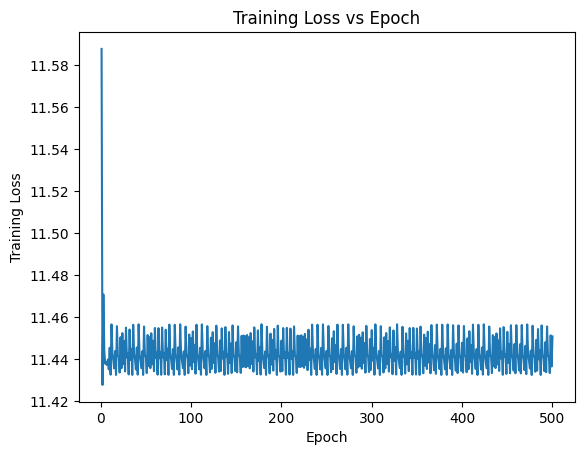

In [ ]:
def validate_data(validation_data, theta):
    correct = 0

    for sample in validation_data:
        X_prime = sample[:-1] + [1]
        z = sum(x * w for x, w in zip(X_prime, theta))
        h = sigmoid(z)

        if h >= 0.5:
            h = 1
        else:
            h = 0

        y = sample[-1]
        if h == y:
            correct += 1

    N_val = len(validation_data)
    val_acc = correct * 100 / N_val
    return val_acc

# Validation loop for training data
train_accuracy = validate_data(train, theta)
print("Training Accuracy:", train_accuracy)

# Validation loop for validation data
validation_accuracy = validate_data(val, theta)
print("Validation Accuracy:", validation_accuracy)

# Plot training loss versus epoch graph
plt.plot(range(1, max_iter + 1), history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()
